# Import Libraries and Read CSV

In [1]:
# General
import numpy as np
import pandas as pd
import random

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Hypothesis Testing
import scipy.stats as stats

In [2]:
# Read all_loans.csv
df_all_loans = pd.read_csv('Dataset/all_loans.csv')

---

# Inspection

In [3]:
# 1. Copy df_all_loans to df and get info
df = df_all_loans.copy(deep=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187819 entries, 0 to 2187818
Data columns (total 31 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   LOAN_ID                          int64  
 1   LOAN_NAME                        object 
 2   FUNDED_AMOUNT                    float64
 3   LOAN_AMOUNT                      float64
 4   STATUS                           object 
 5   IMAGE_ID                         float64
 6   VIDEO_ID                         float64
 7   ACTIVITY_NAME                    object 
 8   SECTOR_NAME                      object 
 9   LOAN_USE                         object 
 10  COUNTRY_CODE                     object 
 11  COUNTRY_NAME                     object 
 12  TOWN_NAME                        object 
 13  CURRENCY_POLICY                  object 
 14  CURRENCY_EXCHANGE_COVERAGE_RATE  float64
 15  CURRENCY                         object 
 16  PARTNER_ID                       int64  
 17  POSTED_T

In [4]:
# 2. Check if there are nulls in each column
df.isna().sum()

LOAN_ID                                  0
LOAN_NAME                            50390
FUNDED_AMOUNT                            0
LOAN_AMOUNT                              0
STATUS                                   0
IMAGE_ID                             46041
VIDEO_ID                           2186598
ACTIVITY_NAME                            0
SECTOR_NAME                              0
LOAN_USE                             46064
COUNTRY_CODE                            36
COUNTRY_NAME                             0
TOWN_NAME                           179120
CURRENCY_POLICY                          0
CURRENCY_EXCHANGE_COVERAGE_RATE     527834
CURRENCY                                 0
PARTNER_ID                               0
POSTED_TIME                              0
PLANNED_EXPIRATION_TIME             371834
DISBURSE_TIME                         4291
RAISED_TIME                         101397
LENDER_TERM                             24
NUM_LENDERS_TOTAL                        0
NUM_JOURNAL

In [5]:
# 3. Check the distribution of each STATUS
df.STATUS.value_counts()

STATUS
funded         2079878
expired          93733
refunded          9330
fundRaising       4878
Name: count, dtype: int64

In [6]:
# 4. Get the number of unique ACTIVITY_NAME
df.ACTIVITY_NAME.nunique()

163

In [7]:
# 5. Check the distribution of each SECTOR_NAME
df.SECTOR_NAME.value_counts()

SECTOR_NAME
Agriculture       573618
Food              480270
Retail            419756
Services          145391
Clothing          116402
Housing           112566
Personal Use       83960
Education          78506
Transportation     50268
Arts               43597
Health             31561
Construction       25498
Manufacturing      21134
Entertainment       2663
Wholesale           2629
Name: count, dtype: int64

In [8]:
# 6. Check the distribution of each CURRENCY_EXCHANGE_COVERAGE_RATE
df.CURRENCY_EXCHANGE_COVERAGE_RATE.value_counts()

CURRENCY_EXCHANGE_COVERAGE_RATE
0.1    1360551
0.2     179709
0.0     119725
Name: count, dtype: int64

In [9]:
# 7. Get the number of unique TAGS
df.TAGS.nunique()

232249

In [10]:
# 8. Check the number of rows where LOAN_NAME contains 'group' but BORROWER_NAMES contains a single name
df['BORROWER_NAMES'] = df['BORROWER_NAMES'].str.lower()
df['NUM_NAMES'] = df['BORROWER_NAMES'].apply(lambda x: len(str(x).split(', ')) if pd.notna(x) else 0)
filtered_df = df[df['LOAN_NAME'].str.lower().str.contains('group', na=False)]
filtered_df_single_name = filtered_df[filtered_df['NUM_NAMES'] == 1]
filtered_df_single_name.shape[0]

487

In [11]:
# 9. Check the number of rows where LOAN_NAME does not contain 'group' but BORROWER_NAMES contains multiple names
df_no_group = df[~df['LOAN_NAME'].str.lower().str.contains('group', na=False)]
df_multiple_names = df_no_group[df_no_group['BORROWER_NAMES'].str.lower().str.contains(', ', na=False)]
df_multiple_names.shape[0]

46

D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='LENDER_TERM_BIN', ylabel='count'>

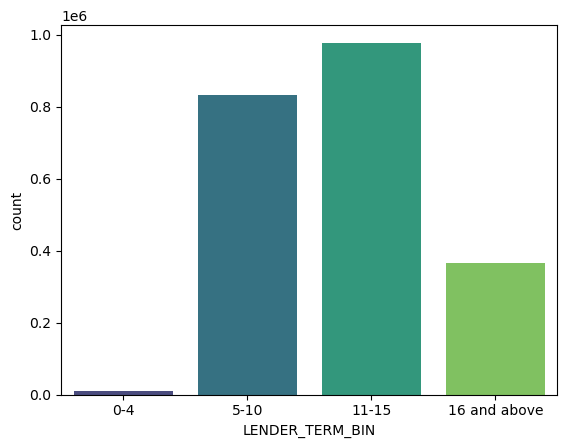

In [12]:
# 10. Check the distribution of LENDER_TERM after binning, consider four bins for now
bin_edges = [0, 4, 10, 15, np.inf]
bin_labels = ['0-4', '5-10', '11-15', '16 and above']

df['LENDER_TERM'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['LENDER_TERM'].fillna(df['LENDER_TERM'].median(), inplace=True)  # Replace NaN with the median or any other suitable strategy

df['LENDER_TERM_BIN'] = pd.cut(df['LENDER_TERM'], bins=bin_edges, labels=bin_labels, right=True)
sns.countplot(data=df, x='LENDER_TERM_BIN', palette='viridis')

In [13]:
# 11. Check Philippines STATUS
df_ph = df[df['COUNTRY_NAME'] == 'Philippines']
df_ph['STATUS_RECODE'] = df_ph['STATUS'].apply(lambda x: 'funded' if x == 'funded' else 'not funded')
df_ph['STATUS_RECODE'].value_counts()

C:\Users\jdmamangun\AppData\Local\Temp\ipykernel_9192\4021508210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ph['STATUS_RECODE'] = df_ph['STATUS'].apply(lambda x: 'funded' if x == 'funded' else 'not funded')


STATUS_RECODE
funded        472448
not funded      5467
Name: count, dtype: int64

In [14]:
# 12. Philippines Hypothesis Test: STATUS_RECODE vs. IMAGE_ID
def binarize_image_id(x):
    if x > 0:
        return 1
    else:
        return 0

df_ph['IMAGE_ID'] = df_ph['IMAGE_ID'].apply(binarize_image_id)
ct = pd.crosstab(df_ph['STATUS_RECODE'], df_ph['IMAGE_ID'])

print(f'Chi-Square Test: {stats.chisquare(ct)}\n')
print(f'Fisher-Exact Test: {stats.fisher_exact(ct)}\n')

C:\Users\jdmamangun\AppData\Local\Temp\ipykernel_9192\747987382.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ph['IMAGE_ID'] = df_ph['IMAGE_ID'].apply(binarize_image_id)


Chi-Square Test: Power_divergenceResult(statistic=array([  1609.59392789, 454908.81705855]), pvalue=array([0., 0.]))

Fisher-Exact Test: (0.06383200906452363, 0.0)



In [15]:
# 13. Philippines Hypothesis Test: STATUS_RECODE vs. VIDEO_ID
def binarize_video_id(x):
    if x > 0:
        return 1
    else:
        return 0

df_ph['VIDEO_ID'] = df_ph['VIDEO_ID'].apply(binarize_video_id)
ct = pd.crosstab(df_ph['STATUS_RECODE'], df_ph['VIDEO_ID'])

print(f'Chi-Square Test: {stats.chisquare(ct)}\n')
print(f'Fisher-Exact Test: {stats.fisher_exact(ct)}\n')

C:\Users\jdmamangun\AppData\Local\Temp\ipykernel_9192\1275683248.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ph['VIDEO_ID'] = df_ph['VIDEO_ID'].apply(binarize_video_id)


Chi-Square Test: Power_divergenceResult(statistic=array([4.56246181e+05, 5.10000000e+01]), pvalue=array([0.00000000e+00, 9.23659662e-13]))

Fisher-Exact Test: (0.0, 1.0)



In [16]:
# 14. Philippines Hypothesis Test: STATUS_RECODE vs. SECTOR_NAME
ct = pd.crosstab(df_ph['STATUS_RECODE'], df_ph['SECTOR_NAME'])

print(f'Chi-Square Test: {stats.chisquare(ct)}\n')

Chi-Square Test: Power_divergenceResult(statistic=array([105748.69848443,   4595.00086975,   8456.34373587,   2003.1957905 ,
         2233.29584245,    384.        , 113666.36296645,   1208.08143322,
        38674.99076498,   4030.06302314,   8432.42095416, 142695.98616497,
        12074.77087881,  11934.59492655,    192.        ]), pvalue=array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 1.67536801e-085, 0.00000000e+000, 1.06901337e-264,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 1.16355243e-043]))



In [17]:
# 15. Philippines Hypothesis Test: STATUS_RECODE vs. REPAYMENT_INTERVAL
ct = pd.crosstab(df_ph['STATUS_RECODE'], df_ph['REPAYMENT_INTERVAL'])

print(f'Chi-Square Test: {stats.chisquare(ct)}\n')

Chi-Square Test: Power_divergenceResult(statistic=array([ 14882.81447503,   2445.59627774, 438973.80614681]), pvalue=array([0., 0., 0.]))



In [18]:
# 16. Philippines Hypothesis Test: STATUS_RECODE vs. BORROWER_GENDERS
def percent_female(x):
    if x == 'nan':
        return np.nan
    else:
        gender_list = x.split(',')
        count_f = gender_list.count('female')
        count_m = gender_list.count('male')
        if count_f + count_m < 1:
            return np.nan
        else:
            return count_f / (count_f + count_m)

df_ph['BORROWER_GENDERS_PCT_F'] = df_ph['BORROWER_GENDERS'].astype(str).apply(percent_female)
ct = pd.crosstab(df_ph['STATUS_RECODE'], df_ph['BORROWER_GENDERS_PCT_F'])

print(f'Chi-Square Test: {stats.chisquare(ct)}\n')
print(f'Fisher-Exact Test: {stats.fisher_exact(ct)}\n')

Chi-Square Test: Power_divergenceResult(statistic=array([ 22959.95911902, 432014.49813603]), pvalue=array([0., 0.]))

Fisher-Exact Test: (0.25610228230896465, 1.2192001462817262e-223)



C:\Users\jdmamangun\AppData\Local\Temp\ipykernel_9192\3694620198.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ph['BORROWER_GENDERS_PCT_F'] = df_ph['BORROWER_GENDERS'].astype(str).apply(percent_female)


D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


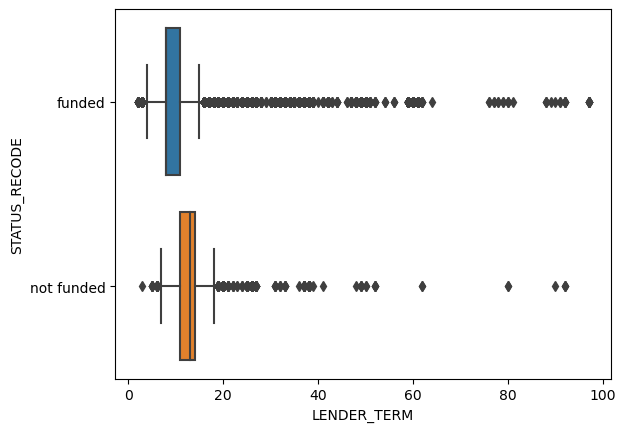

In [19]:
# 17. Philippines Box Plot: STATUS_RECODE vs. LENDER_TERM
sns.boxplot(x=df_ph['LENDER_TERM'], y=df_ph['STATUS_RECODE'])
plt.show()

In [20]:
# 18. Philippines Median Test: STATUS_RECODE vs. LENDER_TERM
funded_vals = df_ph[df_ph['STATUS_RECODE'] == 'funded']['LENDER_TERM'].dropna().tolist()
not_funded_vals = df_ph[df_ph['STATUS_RECODE'] == 'not funded']['LENDER_TERM'].dropna().tolist()
stats.median_test(funded_vals, not_funded_vals)

(6249.577193131856,
 0.0,
 8.0,
 array([[170451,   4806],
        [301997,    661]], dtype=int64))

D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


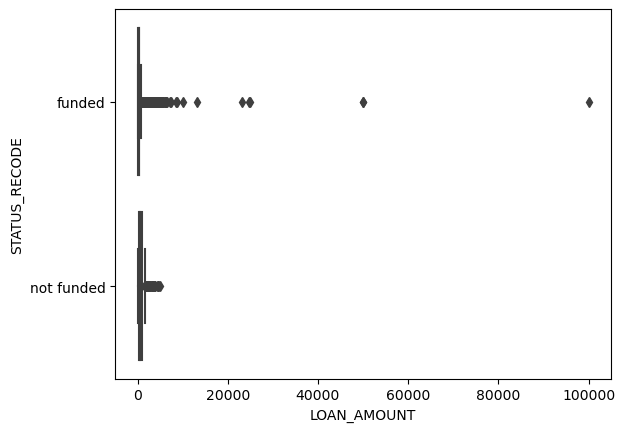

In [21]:
# 19. Philippines Box Plot: STATUS_RECODE vs. LOAN_AMOUNT
sns.boxplot(x=df_ph['LOAN_AMOUNT'], y=df_ph['STATUS_RECODE'])
plt.show()

In [22]:
# 20. Philippines Median Test: STATUS_RECODE vs. LOAN_AMOUNT
funded_vals = df_ph[df_ph['STATUS_RECODE'] == 'funded']['LOAN_AMOUNT'].dropna().tolist()
not_funded_vals = df_ph[df_ph['STATUS_RECODE'] == 'not funded']['LOAN_AMOUNT'].dropna().tolist()
stats.median_test(funded_vals, not_funded_vals)

(4563.018780966707,
 0.0,
 250.0,
 array([[230992,   5185],
        [241456,    282]], dtype=int64))

D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


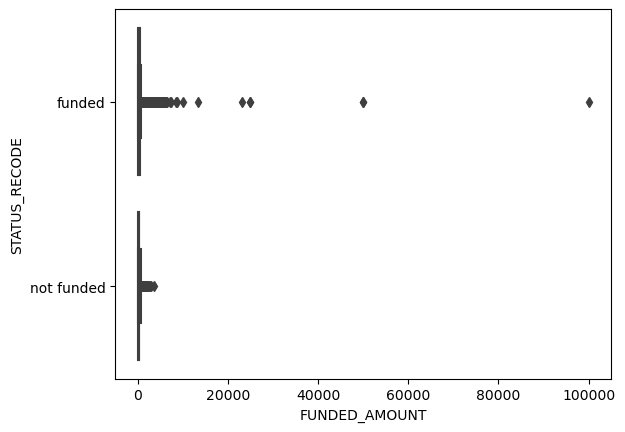

In [23]:
# 21. Philippines Box Plot: STATUS_RECODE vs. FUNDED_AMOUNT
sns.boxplot(x=df_ph['FUNDED_AMOUNT'], y=df_ph['STATUS_RECODE'])
plt.show()

In [24]:
# 22. Philippines Median Test: STATUS_RECODE vs. FUNDED_AMOUNT
funded_vals = df_ph[df_ph['STATUS_RECODE'] == 'funded']['FUNDED_AMOUNT'].dropna().tolist()
not_funded_vals = df_ph[df_ph['STATUS_RECODE'] == 'not funded']['FUNDED_AMOUNT'].dropna().tolist()
stats.median_test(funded_vals, not_funded_vals)

(156.11583956492728,
 7.986455475147886e-36,
 250.0,
 array([[230992,   2208],
        [241456,   3259]], dtype=int64))

D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


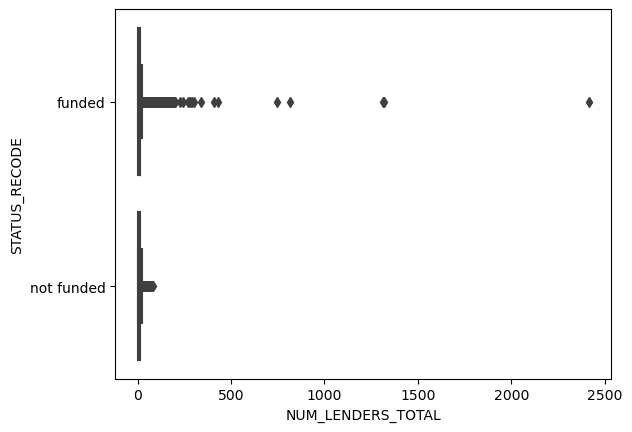

In [25]:
# 23. Philippines Box Plot: STATUS_RECODE vs. NUM_LENDERS_TOTAL
sns.boxplot(x=df_ph['NUM_LENDERS_TOTAL'], y=df_ph['STATUS_RECODE'])
plt.show()

In [26]:
# 24. Philippines Median Test: STATUS_RECODE vs. NUM_LENDERS_TOTAL
funded_vals = df_ph[df_ph['STATUS_RECODE'] == 'funded']['NUM_LENDERS_TOTAL'].dropna().tolist()
not_funded_vals = df_ph[df_ph['STATUS_RECODE'] == 'not funded']['NUM_LENDERS_TOTAL'].dropna().tolist()
stats.median_test(funded_vals, not_funded_vals)

(0.26454346940734574,
 0.6070157723114862,
 7.0,
 array([[224221,   2575],
        [248227,   2892]], dtype=int64))

D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


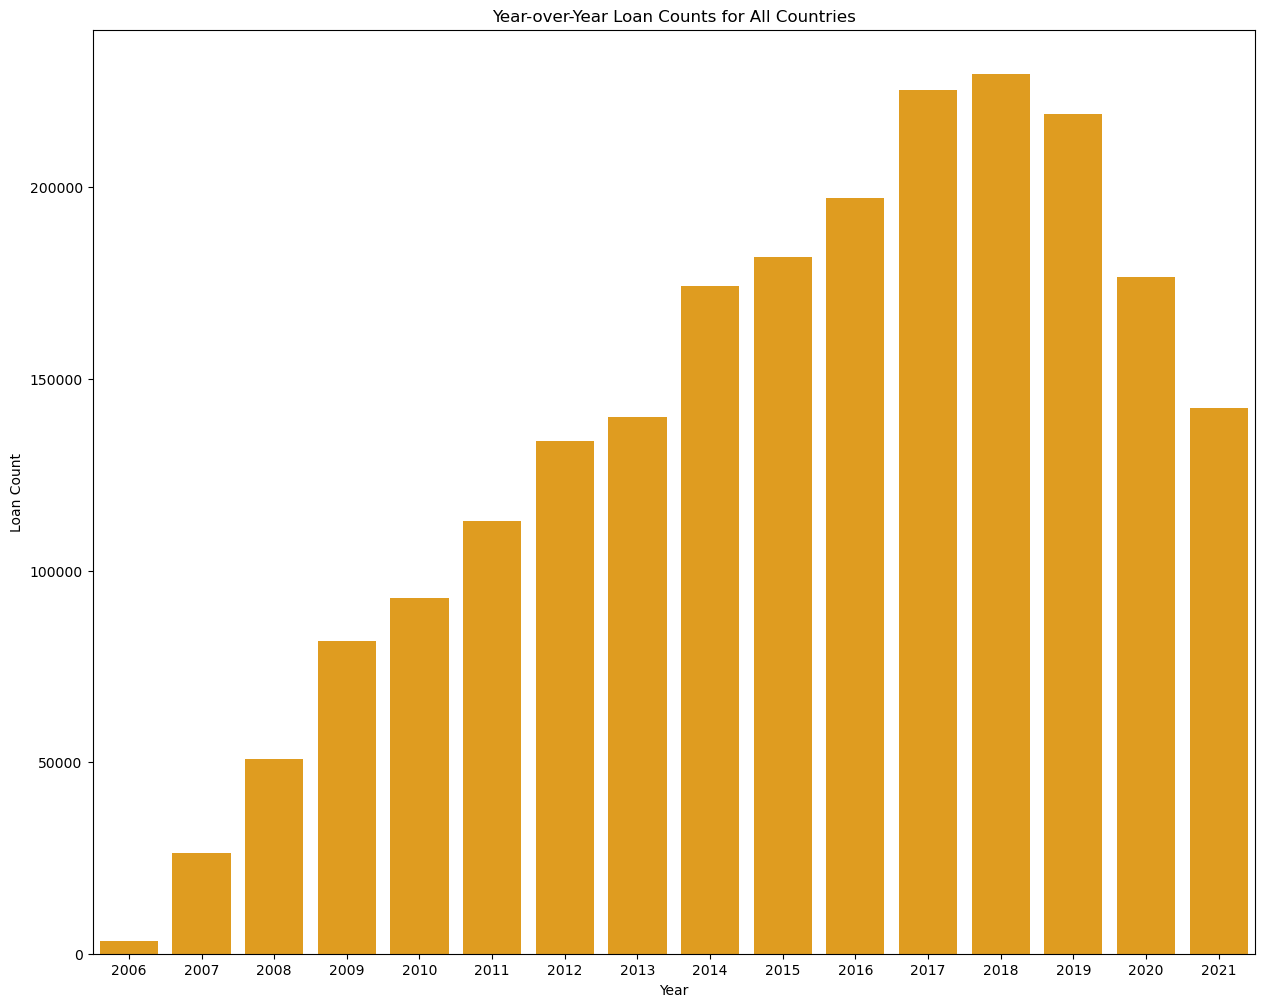

In [27]:
# 25. Year-over-Year All Countries Number of Loans
date_cols = ['POSTED_TIME', 'RAISED_TIME', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME']
df[date_cols] = df[date_cols].apply(pd.to_datetime)
df['POSTED_YEAR'] = df['POSTED_TIME'].dt.year
df = df[['POSTED_TIME', 'POSTED_YEAR'] + [col for col in df.columns if col not in ['POSTED_TIME', 'POSTED_YEAR']]]
yoy_all = df['POSTED_YEAR'].value_counts()

plt.figure(figsize=(15, 12))
sns.barplot(x=yoy_all.index, y=yoy_all.values, color='orange')  
plt.xlabel('Year')
plt.ylabel('Loan Count')
plt.title('Year-over-Year Loan Counts for All Countries')
plt.show()

D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


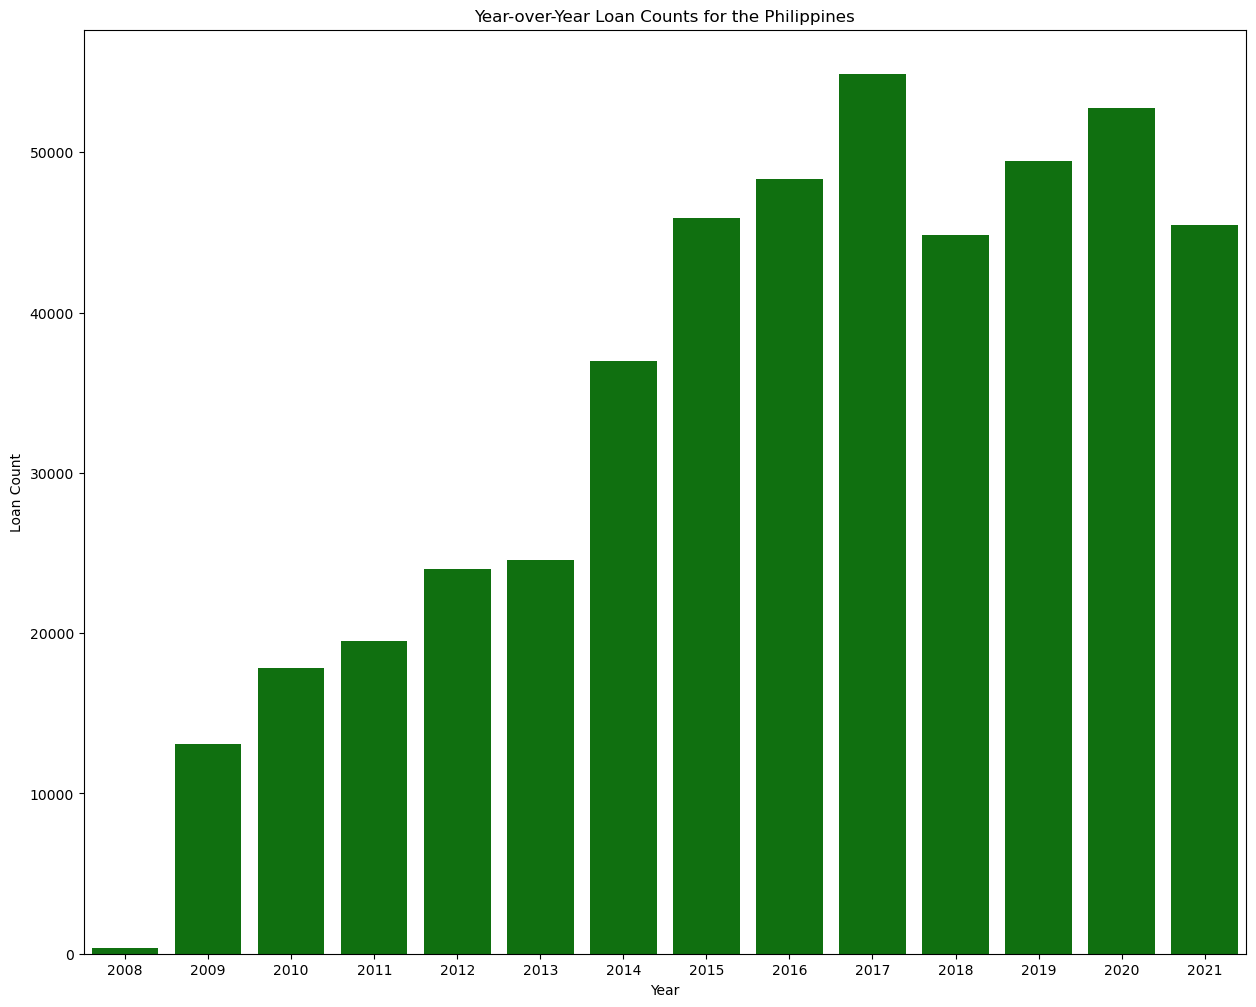

In [28]:
# 26. Year-over-Year Philippines Number of Loans
date_cols = ['POSTED_TIME', 'RAISED_TIME', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME']
df_ph[date_cols] = df_ph[date_cols].apply(pd.to_datetime)
df_ph['POSTED_YEAR'] = df_ph['POSTED_TIME'].dt.year
df_ph = df_ph[['POSTED_TIME', 'POSTED_YEAR'] + [col for col in df_ph.columns if col not in ['POSTED_TIME', 'POSTED_YEAR']]]
yoy_all = df_ph['POSTED_YEAR'].value_counts()

plt.figure(figsize=(15, 12))
sns.barplot(x=yoy_all.index, y=yoy_all.values, color='green')  
plt.xlabel('Year')
plt.ylabel('Loan Count')
plt.title('Year-over-Year Loan Counts for the Philippines')
plt.show()

---

# Data Cleaning 1

In [29]:
# 1. Copy df_all_loans to df
df = df_all_loans.copy(deep=True)

In [30]:
# 2. Convert column names to lowercase
df.columns = df.columns.str.lower()

In [31]:
# 3. Add the word "Group" to those loan_name that is a group but is not indicated as a group 
#    and check distribution of group and non-group loans
df_multiple_names_indices = df_multiple_names.index.tolist()
selected_rows = df.loc[df_multiple_names_indices]
condition = selected_rows['loan_name'].str.contains('&|and', case=False, na=False)
selected_rows.loc[condition, 'loan_name'] = selected_rows.loc[condition, 'loan_name'] + " Group"
df.update(selected_rows)
selected_rows.loc[433067, 'loan_name'] = selected_rows.loc[433067, 'loan_name'] + " Group"
df.update(selected_rows)

df_group_count = df[df['loan_name'].str.lower().str.contains('group', na=False)].shape[0]
df_no_group_count = df[~df['loan_name'].str.lower().str.contains('group', na=False)].shape[0]

print(f"Number of rows where loan_name contains 'group': {df_group_count}")
print(f"Number of rows where loan_name doesn't contain 'group': {df_no_group_count}")

Number of rows where loan_name contains 'group': 288235
Number of rows where loan_name doesn't contain 'group': 1899584


In [32]:
# 4. Rename columns
column_rename_mapping = {
    'lender_term': 'repayment_term',
    'num_lenders_total': 'num_lenders'
}
df.rename(columns=column_rename_mapping, inplace=True)

In [33]:
# 5. Convert to appropriate dtypes
df['loan_id'] = df['loan_id'].astype(str)
df['partner_id'] = df['partner_id'].astype(str)
df['posted_time'] = pd.to_datetime(df['posted_time'])
df['planned_expiration_time'] = pd.to_datetime(df['planned_expiration_time'])
df['disburse_time'] = pd.to_datetime(df['disburse_time'])
df['raised_time'] = pd.to_datetime(df['raised_time'])

In [34]:
# 6. Cut the dataset by selecting only profiles posted within the year range 2014 to 2021
df['posted_year'] = df['posted_time'].dt.year
df = df[(df['posted_year'] >= 2014) & (df['posted_year'] <= 2021)]

---

# Feature Engineering

In [35]:
# 1. Convert loan_name to binary...group loans are the minority/positive class
df_group = df[df['loan_name'].str.lower().str.contains('group', na=False)]
df_no_group = df[~df['loan_name'].str.lower().str.contains('group', na=False)]
df_group_indices = df_group.index.tolist()
df_no_group_indices = df_no_group.index.tolist()
df.loc[df_group_indices, 'group_loan'] = 1
df.loc[df_no_group_indices, 'group_loan'] = 0

In [36]:
# 2. Bin loan_amount in quartiles
df['loan_amount_bin'] = pd.qcut(df['loan_amount'], q=4)

In [37]:
# 3. Convert status to binary...expired cases are the minority/positive class
df['is_expired'] = df['status'].replace({'expired': 1, 
                                         'refunded': 1, 
                                         'fundRaising': 1,
                                         'funded': 0})

In [38]:
# 4. Convert image_id & video_id to binary
df['with_image'] = df['image_id'].notna().astype(int)
df['with_video'] = df['video_id'].notna().astype(int)

In [39]:
# 5. Convert sector_name to binary...personal use are the minority/positive class
personal_use = ['Construction', 'Education', 'Entertainment',
                'Health', 'Housing', 'Personal Use']

business = ['Arts', 'Agriculture',
            'Clothing', 'Food', 'Manufacturing',
            'Retail', 'Services', 'Transportation', 'Wholesale']

def assign_personal_use(sector_name):
    if sector_name in personal_use:
        return 1
    elif sector_name in business:
        return 0
    else:
        return None  # or any other value for cases not covered

df['personal_use'] = df['sector_name'].apply(assign_personal_use)

In [40]:
# 6. Convert partner_covers_currency_loss to binary
df['partner_covers_currency_loss'] = df['currency_exchange_coverage_rate'].replace({np.nan: 0, 
                                                                                    0.0: 0, 
                                                                                    0.1: 1,
                                                                                    0.2: 1})

In [41]:
# 7. Bin repayment_term in two bins then convert it to binary...16 mos and above cases are the minority/positive class
bin_edges = [0, 15, np.inf]
bin_labels = ['0-15', '16 and above']

df['repayment_term'].replace([np.inf, -np.inf], np.nan, inplace=True)

df['repayment_term_bin'] = pd.cut(df['repayment_term'], bins=bin_edges, labels=bin_labels, right=True)
df['repayment_term_bin'] = df['repayment_term_bin'].astype(str)
df['repayment_term_16_mos_and_above'] = df['repayment_term_bin'].replace({'16 and above': 1,
                                                                          '0-15': 0})

In [42]:
# 8.1 Determine the number of days it takes for a profile to get fully-funded,
#    this uses the timedelta approach and avoids potential issues with time zones
mask_fully_funded_not_expired = (df['is_expired'] == 0) & (df['raised_time'] > df['posted_time'])

df.loc[mask_fully_funded_not_expired, 'num_days_to_fully_fund'] = (
    df['raised_time'] - df['posted_time']
).dt.days

df.loc[df['is_expired'] == 1, 'num_days_to_fully_fund'] = np.nan

negative_days_count = df[df['num_days_to_fully_fund'] < 0].shape[0]
print(f"Number of negative values in 'num_days_to_fully_fund': {negative_days_count}")

Number of negative values in 'num_days_to_fully_fund': 0


D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='num_days_to_fully_fund_bin', ylabel='count'>

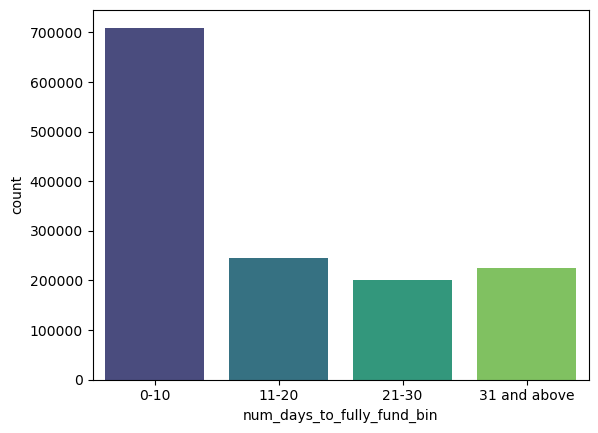

In [43]:
# 8.2 Create an initial binning to see the distribution of num_days_to_fully_fund
bin_edges = [0, 10, 20, 30, np.inf]
bin_labels = ['0-10', '11-20', '21-30', '31 and above']

df['num_days_to_fully_fund'].replace([np.inf, -np.inf], np.nan, inplace=True)

df['num_days_to_fully_fund_bin'] = pd.cut(df['num_days_to_fully_fund'], bins=bin_edges, labels=bin_labels, right=True)
sns.countplot(data=df, x='num_days_to_fully_fund_bin', palette='viridis')

D:\jdmamangun\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jdmamangun\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


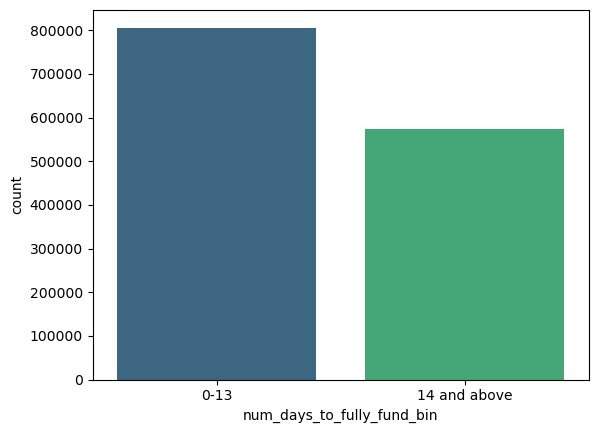

In [44]:
# 8.3 Create a final binning for num_days_to_fully_fund and convert it to binary...
#     14 days and above cases are the minority/positive class
bin_edges = [0, 13, np.inf]
bin_labels = ['0-13', '14 and above']

df['num_days_to_fully_fund'].replace([np.inf, -np.inf], np.nan, inplace=True)

df['num_days_to_fully_fund_bin'] = pd.cut(df['num_days_to_fully_fund'], bins=bin_edges, labels=bin_labels, right=True)
sns.countplot(data=df, x='num_days_to_fully_fund_bin', palette='viridis')
df['num_days_to_fully_fund_bin'] = df['num_days_to_fully_fund_bin'].astype(str)
df['funded_14_days_and_above'] = df['num_days_to_fully_fund_bin'].replace({'14 and above': 1,
                                                                           '0-13': 0})
# To Clarify: 0 to 13 days = within 2 weeks
#           : 14 days and above = after 2 weeks

---

# Data Cleaning 2

In [45]:
# 1. Convert to appropriate dtypes
df['group_loan'] = df['group_loan'].astype('int64')
df['is_expired'] = df['is_expired'].astype('int64')
df['with_image'] = df['with_image'].astype('int64')
df['with_video'] = df['with_video'].astype('int64')
df['personal_use'] = df['personal_use'].astype('int64')
df['partner_covers_currency_loss'] = df['partner_covers_currency_loss'].astype('int64')
df['repayment_term_16_mos_and_above'] = df['repayment_term_16_mos_and_above'].astype('int64')
df['funded_14_days_and_above'] = pd.to_numeric(df['funded_14_days_and_above'], errors='coerce').astype('Int64')

In [46]:
# 2. Drop columns
df = df.drop(columns=['loan_name', 'funded_amount', 'status', 'image_id', 'video_id', 'activity_name', 
                      'country_code', 'town_name', 
                      'currency_policy', 'currency_exchange_coverage_rate', 'currency', 
                      'repayment_term', 'repayment_term_bin', 
                      'posted_year', 'planned_expiration_time', 'disburse_time', 'raised_time',
                      'num_lenders', 'num_journal_entries', 'num_bulk_entries', 'tags',
                      'borrower_names', 'borrower_genders', 'borrower_pictured', 'distribution_model',
                      'num_days_to_fully_fund_bin'])

In [47]:
# 3. Rearrange columns
desired_column_order = [
    'loan_id', 'group_loan', 'with_image', 'with_video', 'posted_time', 'is_expired', 
    'loan_amount', 'loan_amount_bin', 'personal_use', 'sector_name', 'loan_use',
    'num_days_to_fully_fund', 'funded_14_days_and_above', 
    'partner_id', 'repayment_term_16_mos_and_above', 'repayment_interval', 'partner_covers_currency_loss', 
    'country_name'
]
df = df[desired_column_order]

---

# Save CSVs

In [48]:
# 1. Copy df to df_all_loans_cleaned and save to csv
df_all_loans_cleaned = df.copy(deep=True)
df_all_loans_cleaned.to_csv('Dataset/all_loans_cleaned.csv', index=False)

In [49]:
# 2. Copy df to df_sea_loans_cleaned and save to csv
df_sea_loans_cleaned = df.copy(deep=True)
sea_countries = ['Cambodia', 'Indonesia', "Lao People's Democratic Republic", 'Myanmar (Burma)',
                 'Philippines', 'Thailand', 'Timor-Leste', 'Vietnam']
df_sea_loans_cleaned = df_sea_loans_cleaned[df_sea_loans_cleaned['country_name'].isin(sea_countries)]
df_sea_loans_cleaned.to_csv('Dataset/sea_loans_cleaned.csv', index=False)

In [50]:
# 3. Copy df to df_ph_loans_cleaned and save to csv
df_ph_loans_cleaned = df.copy(deep=True)
df_ph_loans_cleaned = df_ph_loans_cleaned[df_ph_loans_cleaned['country_name']=='Philippines']
df_ph_loans_cleaned.to_csv('Dataset/ph_loans_cleaned.csv', index=False)